## Introduction

This is a project launched at Codecademy and it is a part of Data Scientist Career Path. More information [here](https://www.codecademy.com/learn/paths/data-science)

## About Project

Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively.

#### Task 1

Import Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Task 2

Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [2]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [3]:
wood.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [4]:
steel.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


#### Task 3

Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

In [5]:
def rank_1(name, frame, park):
  frame1 = frame[(frame['Name'] == name) & (frame['Park'] == park)]
  x = frame1['Year of Rank']
  y = frame1['Rank']
  plt.figure(figsize=(12,6))
  ax = plt.subplot()
  ax.set_facecolor('PowderBlue')
  plt.plot(x, y, label=name, marker='o', linestyle=':', color='Crimson')
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title('Ranking of a given roller coaster over time')
  plt.legend()
  plt.show()

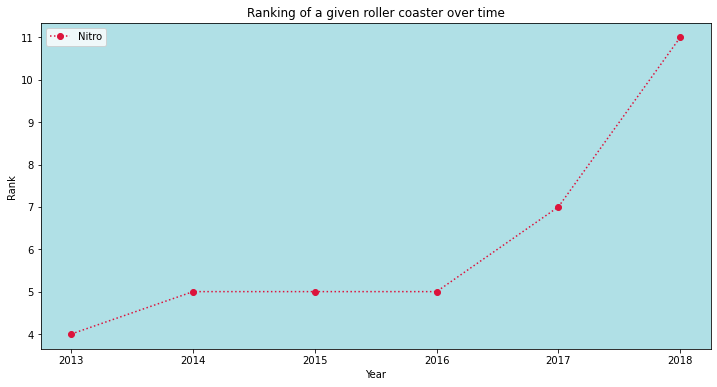

In [6]:
rank_1('Nitro', steel, 'Six Flags Great Adventure')

#### Task 4

Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

In [7]:
def rank_2(name1, frame1, park1, name2, frame2, park2): 
  df_frame1 = frame1[(frame1['Name'] == name1) & (frame1['Park'] == park1)]
  x1 = df_frame1['Year of Rank']
  y1 = df_frame1['Rank']
  df_frame2 = frame2[(frame2['Name'] == name2) & (frame2['Park'] == park2)]
  x2 = df_frame2['Year of Rank']
  y2 = df_frame2['Rank']
  plt.figure(figsize=(12,6))
  ax = plt.subplot()
  ax.set_facecolor('BlanchedAlmond')
  plt.plot(x1, y1, label=name1, marker='o', color='Red')
  plt.plot(x2, y2, label=name2, marker='s', color= 'Green')
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title(name1 + ' vs. ' + name2 + ' over time')
  plt.legend()
  plt.show()

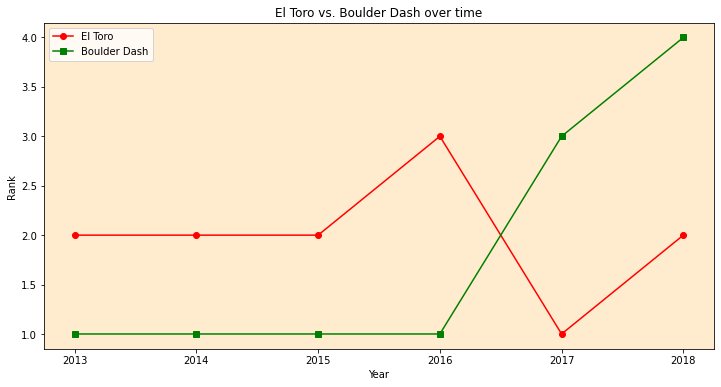

In [8]:
rank_2('El Toro', wood, 'Six Flags Great Adventure', 'Boulder Dash', wood, 'Lake Compounce')

#### Task 5

Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

In [9]:
def n_rank(frame, n):
  top_n_rank = frame[frame.Rank <= n]
  for one_roller_coaster_name in set(top_n_rank.Name):   
    one_roller_coaster_data = top_n_rank[top_n_rank.Name == one_roller_coaster_name]
    plt.plot(one_roller_coaster_data['Year of Rank'], one_roller_coaster_data['Rank'],
             label=one_roller_coaster_name, marker='*')
  plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
  plt.xlabel('Year of Ranking')
  plt.ylabel('Ranking')
  plt.title('Rank ' + str(n) + " Roller Coaster's Rankings")
  ax = plt.subplot()
  ax.set_facecolor('Lavender')
  plt.show()

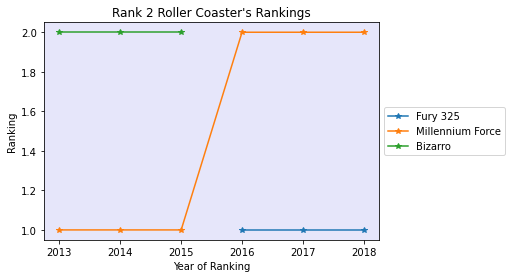

In [10]:
n_rank(steel, 2)

#### Task 6

Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. `Captain Coaster` is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. 

Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [11]:
roller = pd.read_csv('roller_coasters.csv')

In [12]:
roller.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


#### Task 7

Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

In [13]:
def plot_hist(frame, column):
  if column == 'height':
    data = frame[frame[column] <= 140]
    data1 = data.dropna()
  else:
    data1 = frame.dropna()

  df_to_plot_hist = data1[column]

  plt.figure(figsize=(12,6))
  plt.hist(df_to_plot_hist, bins=40, color='Brown', density=True)
  ax = plt.subplot()
  ax.set_facecolor('BurlyWood')
  plt.title('Distribution of ' + column + ' for Roller Coasters')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

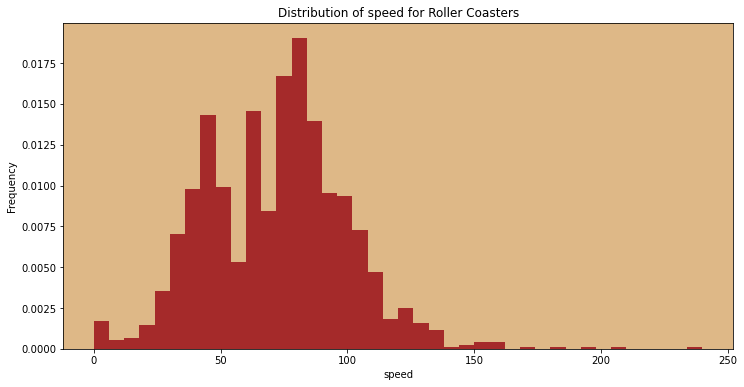

In [14]:
plot_hist(roller, 'speed')

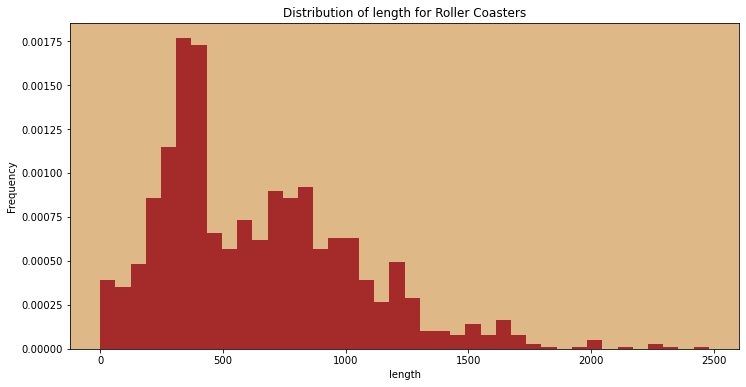

In [15]:
plot_hist(roller, 'length')

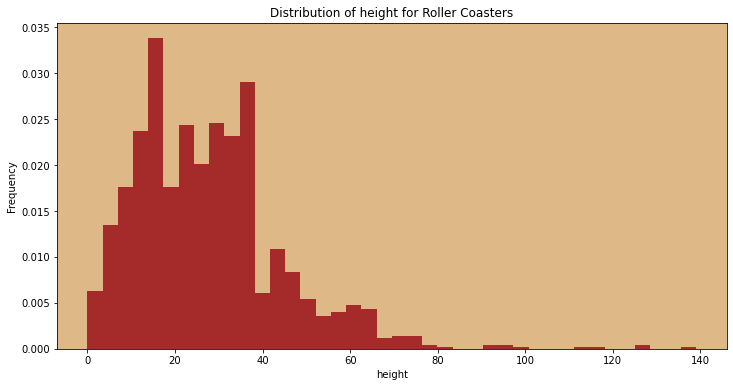

In [16]:
plot_hist(roller, 'height')

#### Task 8

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

In [17]:
def bar_chart(frame, park):
  data_of_park = frame[frame['park'] == park]
  data_of_inversions = data_of_park['num_inversions']
  roller_name = data_of_park['name']
  plt.figure(figsize=(12,6))
  plt.bar(range(len(roller_name)), data_of_inversions, color='Green')
  plt.title("Number of Roller Coaster's inversions in park: " + park)
  plt.ylabel('Frequency')
  ax = plt.subplot()
  ax.set_xticks(range(len(roller_name)))
  ax.set_xticklabels(roller_name, rotation='vertical')
  ax.set_facecolor('GreenYellow')
  plt.show()

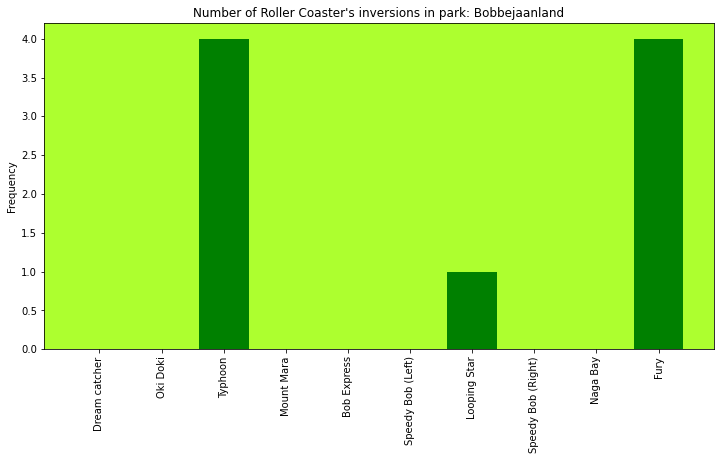

In [18]:
bar_chart(roller, 'Bobbejaanland')

#### Task 9

Write a function that creates a pie chart that compares the number of operating roller coasters `('status.operating')` to the number of closed roller coasters `('status.closed.definitely')`. Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

In [19]:
def open_close_status(frame):
  operating = frame[frame['status'] == 'status.operating']
  number_operating = len(operating)
  closed = frame[frame['status'] == 'status.closed.definitely']
  number_closed = len(closed)
  status_counts = ['Operating', 'Closed']
  plt.figure(figsize=(12, 6))
  plt.pie([number_operating, number_closed], labels=status_counts, autopct='%0.1f%%')
  plt.axis('equal')
  plt.title('Current Running Condition for Roller Coasters')
  plt.show()

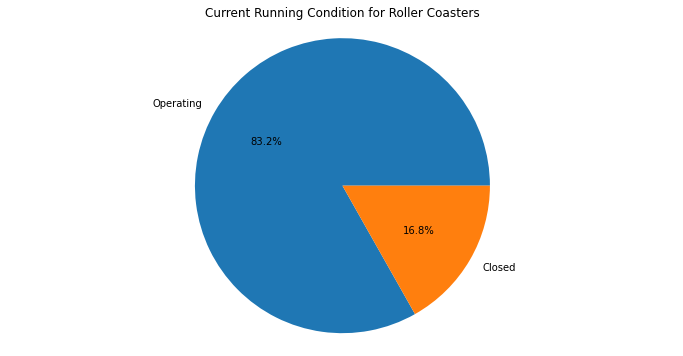

In [20]:
open_close_status(roller)

#### Task 10

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

In [21]:
def scatter_any_two(frame, column1, column2):
  plt.figure(figsize=(12, 6))
  plt.scatter(frame[column1], frame[column2], alpha=0.5)
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Relationship between ' + column1 + " and " + column2)
  plt.show()

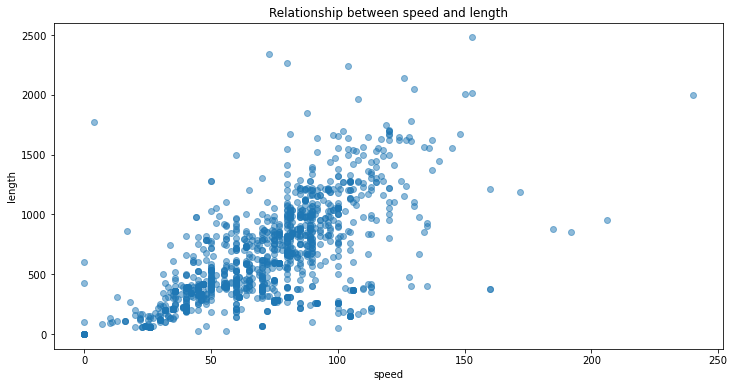

In [22]:
scatter_any_two(roller, 'speed', 'length')

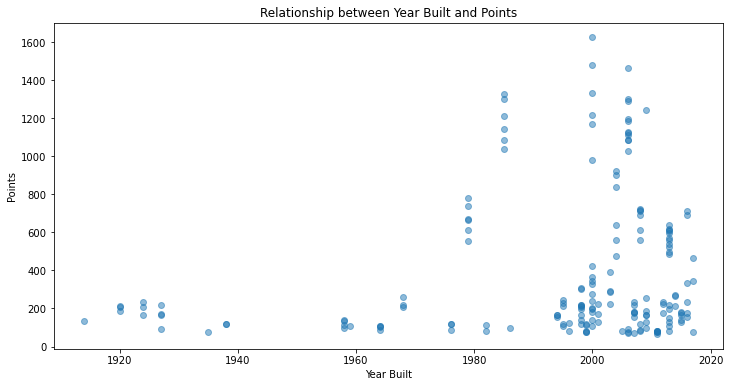

In [23]:
scatter_any_two(wood, 'Year Built', 'Points')

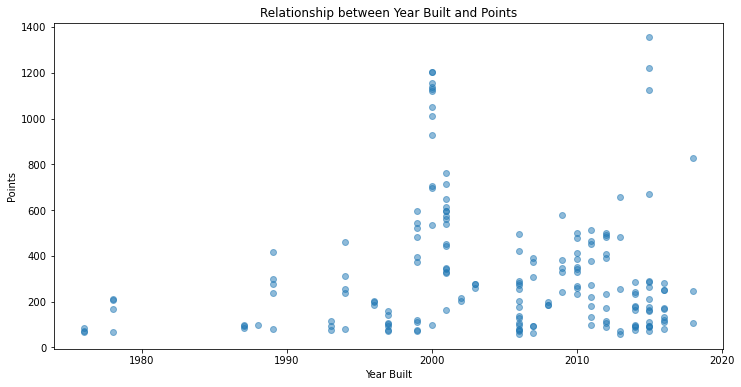

In [24]:
scatter_any_two(steel, 'Year Built', 'Points')